**Project Scope**

In this project various regressions models, including linear, polynomial, stochastic, ridge, lasso and elastic net will be trained to see which model best predicts health insurance costs, based on various features. The best models will be optimized using randomized grid search and the best overall model will be evaluated on the test data.

**Packages**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [85]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

**Dataset**

In [3]:
insurance_df = pd.read_csv('insurance.csv')

In [4]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Dataset Visualisation**

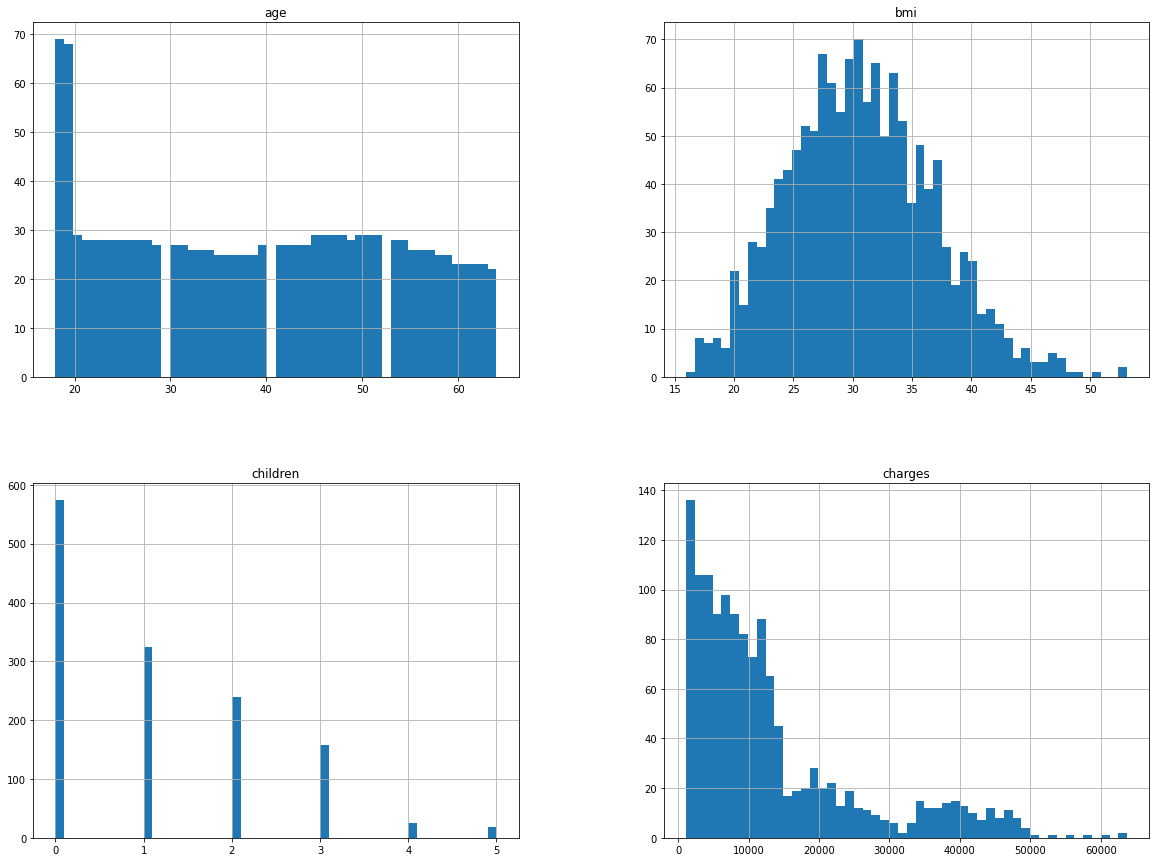

In [84]:
insurance_df.hist(bins=50, figsize=(20,15))
plt.show()

From the histogram plots:
- It can be seen that the age feature is fairly constant apart from a high number of instances around 18-20 years old
- It can be seen that the bmi feature is fairly normally distributed
- It can be seen that the children and charges features are right-skewed (positive skew)

**Preprocessing**

In [6]:
insurance_df_copy = insurance_df.copy() # copy of dataset so the original dataset is not altered

In [7]:
data = insurance_df_copy.iloc[:, :-1]
labels = insurance_df_copy.charges

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, test_size=0.2, random_state=0)

In [9]:
numeric_columns = ['age', 'bmi', 'children']
categorical_columns = ['sex', 'smoker', 'region']

In [10]:
transformer = ColumnTransformer([
    ('num', StandardScaler(), numeric_columns),
    ('cat', OrdinalEncoder(), categorical_columns),
])

**Simple Linear Regression Model**

Pipeline

In [11]:
linear_reg_pipeline = Pipeline(steps=[
    ('columns', transformer), 
    ('model', LinearRegression())
])

Cross-Validation

In [12]:
cross_val_scores = -cross_val_score(linear_reg_pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

print(cross_val_scores)

print(f'\nThe average root mean squared error is: {np.mean(np.sqrt(cross_val_scores))}')

[37523482.97299212 36295990.72059628 21498998.14371552 44221063.67494503
 38194913.66664154 31612190.04231283 45771609.85534251 30840371.19404583
 48560738.60088452 48446216.77678218]

The average root mean squared error is: 6148.729316694702


**Stochastic Gradient Descent Regression Model**

Pipeline

In [13]:
SDG_pipeline = Pipeline(steps=[
    ('columns', transformer), 
    ('model', SGDRegressor())
])

Cross-Validation

In [14]:
cross_val_scores = -cross_val_score(SDG_pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

print(cross_val_scores)

print(f'\nThe average root mean squared error is: {np.mean(np.sqrt(cross_val_scores))}')

[37661892.64384362 36165454.4823659  21808206.53599036 44108088.26747341
 38337813.56958108 31786899.81491603 45732512.7326851  31003210.53505726
 48274069.16837797 48607403.05685118]

The average root mean squared error is: 6154.224911076127


**Polynomial Regression Model**

Pipeline

In [15]:
poly_pipeline = Pipeline(steps=[
    ('columns', transformer), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', SGDRegressor())
])

Cross-Validation

In [16]:
cross_val_scores = -cross_val_score(poly_pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

print(cross_val_scores)

print(f'\nThe average root mean squared error is: {np.mean(np.sqrt(cross_val_scores))}')

[23364799.26775908 23371851.47557955 13055896.21608303 26475863.17080561
 23392086.81450852 21817381.96412967 24887696.234557   22077009.76203162
 33522929.67938278 39268663.25177785]

The average root mean squared error is: 4967.811349171886


**Ridge Regression**

Pipeline

In [17]:
ridge_pipeline = Pipeline(steps=[
    ('columns', transformer), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Ridge(alpha=1, solver='cholesky'))
])

Cross-Validation

In [18]:
cross_val_scores = -cross_val_score(ridge_pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

print(cross_val_scores)

print(f'\nThe average root mean squared error is: {np.mean(np.sqrt(cross_val_scores))}')

[22830844.69021647 22903784.9619849  11798836.25554161 26219317.38267369
 23535261.43293836 21114278.6268196  24614515.4677225  20862080.15883229
 33739192.37923143 39347991.24265978]

The average root mean squared error is: 4917.586675519177


**Lasso Regression**

Pipeline

In [19]:
lasso_pipeline = Pipeline(steps=[
    ('columns', transformer), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Lasso(alpha=1))
])

Cross-Validation

In [20]:
cross_val_scores = -cross_val_score(lasso_pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

print(cross_val_scores)

print(f'\nThe average root mean squared error is: {np.mean(np.sqrt(cross_val_scores))}')

[22891331.58618161 22861516.25348298 11823086.25150959 26165725.73107351
 23571746.82194484 21139925.83479377 24596460.13121929 20767589.44373555
 33830591.63084054 39304816.70816713]

The average root mean squared error is: 4917.485961657199


**Elastic Net**

Pipeline

In [21]:
elastic_net_pipeline = Pipeline(steps=[
    ('columns', transformer), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', ElasticNet(alpha=1, l1_ratio=0.9))
])

Cross-Validation

In [22]:
cross_val_scores = -cross_val_score(elastic_net_pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

print(cross_val_scores)

print(f'\nThe average root mean squared error is: {np.mean(np.sqrt(cross_val_scores))}')

[32846900.56006468 29149957.17060525 15453315.65744392 34651193.8530454
 26542943.18815551 28395166.5781045  36060620.91166274 29584502.2052732
 36730036.79499406 50000367.4842845 ]

The average root mean squared error is: 5600.44227489362


**Best Models**

The best models were found to be the polynomial, Ridge, Lasso and elastic net regression models, based on their RSME scores. It was decided that these algorithms would be fine-tuned using Randomized Grid Search and cross-validation.

**Fine-Tuning**

**Polynomial Regression Randomized Search**

In [25]:
# Polynomial pipeline
poly_pipeline_fine = Pipeline(steps=[
    ('columns', transformer), 
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', SGDRegressor())
])

param_grid = {'poly__degree': sp_randint(1, 20)} # has to be poly__degree so its referencing 'poly'


# Randomized Search object with 10 iterations and 10 fold cross validation
grid_search_poly = RandomizedSearchCV(estimator=poly_pipeline_fine, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1, cv=10)

# Fitting Randomized Search
grid_search_poly.fit(X_train, y_train) 

print(f'The best parameters were found to be {grid_search_poly.best_params_}')

The best parameters were found to be {'poly__degree': 2}


Based on this randomized grid search 2 is the best polynomial degree to use, this is the same as the previously built **Polynomial Regression Model** so it will not be built again. Therefore, this degree will be used in the ridge and lasso models.

**Ridge Regression Randomized Search**

In [36]:
# Ridge pipeline
ridge_pipeline_fine = Pipeline(steps=[
    ('columns', transformer), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Ridge(solver='cholesky'))
])

# ridge_pipeline_fine.get_params().keys()

param_grid = {'model__alpha': list(np.arange(0, 5, 0.1))} # param grid for alpha 

# Randomized Search object with 50 iterations and 10 fold cross validation
grid_search_ridge = RandomizedSearchCV(estimator=ridge_pipeline_fine, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', n_jobs=-1, cv=10)

# Fitting Randomized Search
grid_search_ridge.fit(X_train, y_train)

print(f'The best parameters were found to be {grid_search_ridge.best_params_}')

The best parameters were found to be {'model__alpha': 0.7000000000000001}


For the ridge regression it was found that the optimum alpha value is 0.7 for the Ridge model

In [38]:
# Fine Tuned Ridge Regression Model

ridge_pipeline_optimum = Pipeline(steps=[
    ('columns', transformer), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Ridge(alpha=0.7000000000000001, solver='cholesky'))
])

In [39]:
# Cross validation optimised Ridge Model

cross_val_scores_ridge_optimum = -cross_val_score(ridge_pipeline_optimum, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

print(cross_val_scores_ridge_optimum)

print(f'\nThe average root mean squared error for the fine-tuned Ridge Regression model is: {np.mean(np.sqrt(cross_val_scores_ridge_optimum))}')

[22848249.94730067 22895077.71000129 11803332.09816722 26203591.73747623
 23548285.73160676 21125714.84075401 24607179.42706192 20833684.69810461
 33758041.52253973 39336576.72541488]

The average root mean squared error for the fine-tuned Ridge Regression model is: 4917.534647066926


It was found that the optimized Ridge Regression model slightly improved upon the unoptimized Ridge Regression model.

**Lasso Regression Randomized Search**

In [43]:
# Lasso pipeline
lasso_pipeline_fine = Pipeline(steps=[
    ('columns', transformer), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Lasso())
])

param_grid = {'model__alpha': list(np.arange(0,20, 0.1))} # param grid for alpha 

# Randomized Search object with 50 iterations and 10 fold cross validation
grid_search_lasso = RandomizedSearchCV(estimator=lasso_pipeline_fine, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', n_jobs=-1, cv=10)

# Fitting Randomized Search
grid_search_lasso.fit(X_train, y_train)

print(f'The best parameters were found to be {grid_search_lasso.best_params_}')

The best parameters were found to be {'model__alpha': 16.7}


For the lasso regression it was found that the optimum alpha value is 16.7 for the lasso model. This higher value for alpha implies that there were some useless features in the model and therefore by increasing alpha the affect of these features has been decreased, decreasing the variance of the model (the model will not overfit as severly)

Some notes:
- High error but validation and training error close together = high bias
- Validation and training error far apart = high variance

In [89]:
# Fine Tuned Lasso Regression Model

lasso_pipeline_optimum = Pipeline(steps=[
    ('columns', transformer), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Lasso(alpha=16.7))
])

In [46]:
# Cross validation optimised Lasso Model

cross_val_scores_lasso_optimum = -cross_val_score(lasso_pipeline_optimum, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

print(cross_val_scores_lasso_optimum)

print(f'\nThe average root mean squared error for the fine-tuned Ridge Regression model is: {np.mean(np.sqrt(cross_val_scores_lasso_optimum))}')

[22881607.56900655 22644961.75825492 11987368.35507081 26127561.16672233
 23459518.90106246 20931000.78626411 24631564.44093117 20761190.98555681
 34102310.79691606 39206984.19941744]

The average root mean squared error for the fine-tuned Ridge Regression model is: 4915.521008218869


It was found that the optimized lasso model improved upon the unoptimized lasso model. Furthermore, this model was found to be better than the optimized Ridge Regression model.

**Elastic Net Regression Randomized Search**

In [78]:
# Elastic Net Fine-Tuning Pipeline
elastic_net_pipeline_fine = Pipeline(steps=[
    ('columns', transformer),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', ElasticNet())
]) 

# Elastic Net Parameter Grid
param_grid = {'model__alpha': list(np.arange(0,20, 0.1)), 'model__l1_ratio': list(np.arange(0, 1, 0.001))}

# Randomized Search using 10 iterations and 10 fold cross-validation
grid_search_elastic_net = RandomizedSearchCV(estimator=elastic_net_pipeline_fine, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', n_jobs=-1, cv=10)

# Fitting Randomized Search
grid_search_elastic_net.fit(X_train, y_train)

print(f'The best parameters were found to be {grid_search_elastic_net.best_params_}')

The best parameters were found to be {'model__l1_ratio': 0.997, 'model__alpha': 11.9}


It was found using the randomized search that the best parameters for the elastic net model was l1_ratio = 0.997 and alpha = 11.9

In [80]:
# Fine-Tuned Elastic Net Regression Model
elastic_net_pipeline_optimum = Pipeline(steps=[
    ('columns', transformer),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', ElasticNet(alpha=11.9, l1_ratio=0.997))
]) 

In [81]:
# Cross validation optimised Lasso Model

cross_val_scores_elastic_optimum = -cross_val_score(elastic_net_pipeline_optimum, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

print(cross_val_scores_elastic_optimum)

print(f'\nThe average root mean squared error for the fine-tuned Ridge Regression model is: {np.mean(np.sqrt(cross_val_scores_elastic_optimum))}')

[25830929.67408768 24845503.46893547 12738283.7605075  29198178.00901043
 24200251.76046801 22914046.35149217 28855346.28734498 24439863.17364151
 34156670.09717724 43205988.99819051]

The average root mean squared error for the fine-tuned Ridge Regression model is: 5147.866756852011


Based on this cross-validation score it was found that the optimized model improved on the unoptimized elastic net model. However, this model was not as good as the other optimized models.

**Fine-Tuning Summary**

It was found that the best model for this data was optimized lasso model: 'lasso_pipeline_optimum'. This resulted in a RSME score of 4915.52. Therefore, this model will be evaluated on the test data to see how it performs on unseen data, from which it will be seen if the model is overfitting or not.

**Final Model Evaluation**

In [94]:
# Need to fit data to optimized lasso model as previously on cross validation has been done
lasso_pipeline_optimum.fit(X_train, y_train) 

predictions = lasso_pipeline_optimum.predict(X_test)

mean_squared_error_lasso = mean_squared_error(y_test, predictions)

print(f'\nThe RSME for the final optimized lasso model for the test data was found to be {np.sqrt(mean_squared_error_lasso)}')


The RSME for the final optimized lasso model for the test data was found to be 4319.409436075967


It was found that the RSME for the test data was actually lower than that found in cross-validation for the training data. This means that the model will be appropriate for future predictions. However, this could also be an indication of sampling bias, meaning that the test data was easy to evaluate on, which may not be true for future predicitons.